In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import softmax, sigmoid, numerical_diff,numerical_gradient,gradient_descent

In [2]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    return a3


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


#### 数值微分的例子

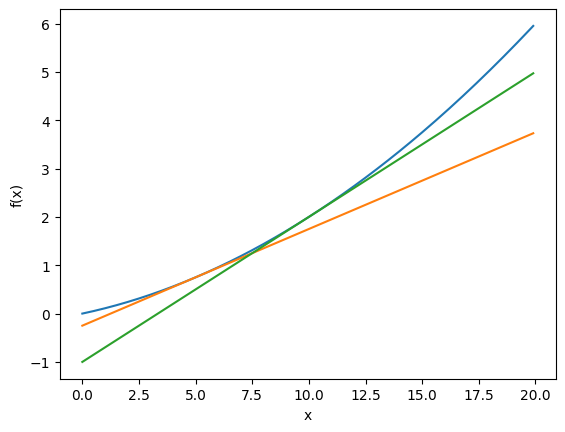

In [3]:
def f1(x):
    return 0.01*x**2 + 0.1 * x


def tangent_line(f, x):
    # 求x为*时的切线
    d = numerical_diff(f, x)  # x为*时的导数
    y = f(x) - d*x
    return lambda t: d*t + y  # 切线方程


x = np.arange(0.0, 20.0, 0.1)
y = f1(x)

tf = tangent_line(f1, 5)
y2 = tf(x)

tf1 = tangent_line(f1, 10)
y3 = tf1(x)

# 绘制函数图像
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


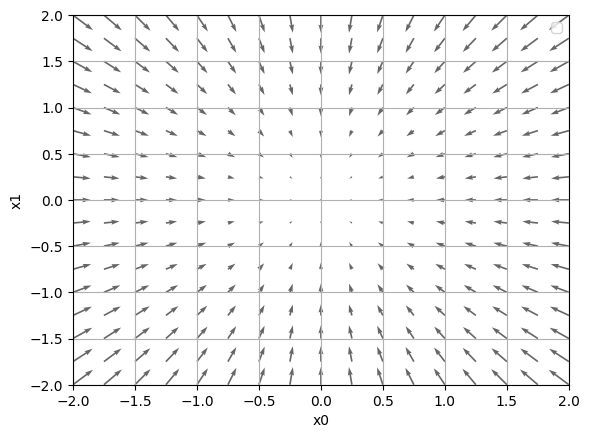

In [4]:
def f2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
# X, Y = np.meshgrid(x, y) 代表的是将x中每一个数据和y中每一个数据组合生成很多点
# 然后将这些点的x坐标放入到X中,y坐标放入Y中,并且相应位置是对应的
# x = [1, 2]
# y = [3, 4]
# X, Y = np.meshgrid(x, y)
# X, Y
# (array([[1, 2],
#         [1, 2]]),
#  array([[3, 3],
#         [4, 4]]))
X, Y = np.meshgrid(x0, x1)
# x.flatten()是把numpy对象x降低到一维，默认是按照行来降维的
# 等同于x.flatten('A') 想要按照列的方向降维，格式为：x.flatten('F')
X = X.flatten()
Y = Y.flatten()
# 求梯度
grad = numerical_gradient(f2, np.array([X, Y]))
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()

Text(0, 0.5, 'X1')

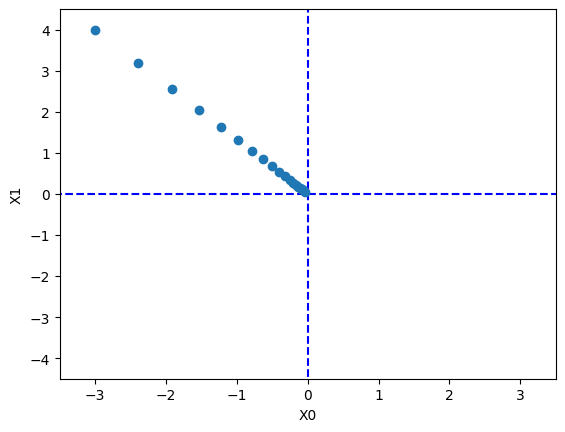

In [5]:
# 用梯度法求 f(x0 + x1) = x0**2 + x1 ** 2 的最小值
def f3(x):
    return x[0] ** 2 + x[1] ** 2


init_x = np.array([-3.0, 4.0])
lr = 0.1
step_num = 20
x, x_history = gradient_descent(f3, init_x, lr, step_num)
plt.plot([-5, 5], [0, 0], '--b')
plt.plot([0, 0], [-5, 5], '--b')
plt.plot(x_history[:, 0], x_history[:, 1], 'o')
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")